# Chapter.5 Multi-variate Linear Regression

## Programming Assignment.5-01 Gradient Descent Method

기존 Chapter4에서 사용했던 기존의 Model
$$\hat{y} = \theta_{1}x + \theta_{0}$$
에서 여러개의 변수를 사용하게 되는데
2개부터 적용하게 되면 Model은 다음과 같이
$$\hat{y} = \theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}$$
가 됩니다.

따라서 이번 PA 5-01에서는 다음의 단계들을 통해 $$\hat{y} = \theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}$$에 대해 gradient descent method를 적용하여 $\theta_{2}, \theta_{1}, \theta_{0}$을 학습시킵니다.

<ul>
    <li> Step.1 Dataset Preparation </li>
    <li> Step.2 One Iteration of GDM </li>
    <li> Step.3 Gradient Descent Method </li>
    <li> Step.4 Predictor Visualization </li>
</ul>


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

from LR_dataset_generator import LR_dataset_generator

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Preparation

MVLR을 위한 dataset은
$$y = ax_{2} + bx_{1} + c$$
에서부터 만들어집니다

$$y = 2x_{2} - 1x_{1} + 3$$
에서 200개의 data sample을 가지는 dataset을 만드는 코드입니다
<br> mean의 경우 0으로 지정하고 standard deviation은 1로 설정합니다

In [11]:
n_sample = 200
coefficient_list = [3, -1, 2]

data_gen = LR_dataset_generator(feature_dim = 2)
data_gen.set_n_sample(n_sample)
distribution_params = {
    1: {'mean':0, 'std':1},
    2: {'mean':0, 'std':1}
}
data_gen.set_coefficient(coefficient_list)
x_data, y_data = data_gen.make_dataset()
dataset = np.hstack((x_data, y_data))

print(dataset.shape)



(200, 4)


***
**Programming**  
위의 코드를 이용하여
$$y = 5x_{2} - 3x_{1} + 7$$
에서부터 700개의 data sample을 가지는 dataset을 만드세요.<br>
mean은 0으로 standard deviation는 1로 설정합니다

In [12]:
##### Start Your Code(Learning Preparation) #####
n_sample = 700
coefficient_list = [7, -3, 5]
data_gen = LR_dataset_generator(feature_dim = 2)
data_gen.set_n_sample(n_sample)
distribution_params = {
    1: {'mean':0, 'std':1},
    2: {'mean':0, 'std':1}
}
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)

##### End Your Code(Learning Preparation) #####
x_data, y_data = data_gen.make_dataset()
dataset = np.hstack((x_data, y_data))
print(dataset.shape)

(700, 4)


**Expected Output**  
(700, 4)

***
## Step.2 One Iteration of GDM

SVLR의 predictor는 다음과 같다.
$$
\hat{y} = \theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}
$$

따라서 1개의 data sample에 대한 loss는

$$ \mathcal{L}^{(i)} = (y^{(i)} - \hat{y}^{(i)})^{2} = (y^{(i)} - (\theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}))^{2}$$

이므로 $\mathcal{L}$은 $\theta_{2}, \theta_{1}, \theta_{0}$에 대한 함수이다.  
이때 각각 $\theta_{2}, \theta_{1}, \theta_{0}$에 대한 partial derivative를 구하면
$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{2}}
= -2x_{2}^{(i)}(y^{(i)} - (\theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}))
$$

$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{1}}
= -2x_{1}^{(i)}(y^{(i)} - (\theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}))
$$

$$
\frac {\partial \mathcal{L}^{(i)}} {\partial \theta_{0}}
= -2(y^{(i)} - (\theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}))
$$

이다. 위의 partial derivative를 이용하여 GDM을 적용하면 $\theta_{1}, \theta_{0}$은 다음과 같이 update됩니다.

$$ \theta_{1} := \theta_{1} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} 
= \theta_{1} + 2\alpha x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$

$$ \theta_{0} := \theta_{0} - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} 
= \theta_{0} + 2\alpha(y^{(i)} - \hat{y}^{(i)})$$

***
**Programming**  
data sample에 대하여 한 번의 iteration을 연산해보세요.  
이때 학습 조건은 다음과 같습니다.
- initial theta2, theta1, theta0 = 1, 1
- learning rate = 0.01
- $x_{2}$, $x_{1}$,  y = 2, 1, 6

In [13]:
##### Start Your Code(Initial Setting) #####
th2, th1, th0 = 1, 1, 1
lr = 0.01
x2 = 2
x1 = 1
y = 6

##### End Your Code(Initial Setting) #####
print("Before Update:", th2, th1, th0)


##### Start Your Code(Partial Derivative Calculation) #####
pred = th2*x2 + th1*x1 + th0
dth2 = -2*x2 * (y - pred)
dth1 = -2*x1 * (y - pred)
dth0 = -2 * (y - pred)
##### Start Your Code(Partial Derivative Calculation) #####


##### Start Your Code(Gradient Descent Method) #####
th2 = th2 - lr*dth2
th1 = th1 - lr*dth1
th0 = th0 - lr*dth0
##### Start Your Code(Gradient Descent Method) #####
print("After Update:", th2, th1, th0)

Before Update: 1 1 1
After Update: 1.08 1.04 1.04


**Expected Output**  
Before Update: 1 1 1 
<br>After Update: 1.08 1.04 1.04

***
## Step.3 Gradient Descent Method

Step.3에서는 dataset에 들어있는 data sample들을 이용하여 $\theta_{2}, \theta_{1}, \theta_{0}$를 학습시킵니다.

***
**Programming**  
PA 3-01과 마찬가지로 for loop을 이용하여 data sample에 접근하고, 각 data sample에 대해 GDM을 적용하여 $\theta_{2}, \theta_{1}, \theta_{0}를 학습시키세요.$  
이때 학습 조건은 다음과 같습니다.
- $\theta_{2}, \theta_{1}, \theta_{0} = 0.1, 0.1$
- learning rate = 0.01
- epochs = 3

학습이 끝나면 target function $y = 5x_{2} - 3x_{1} + 7$에 가까워지도록 $\theta_{1}, \theta_{0}$가 학습되는지 확인하세요.

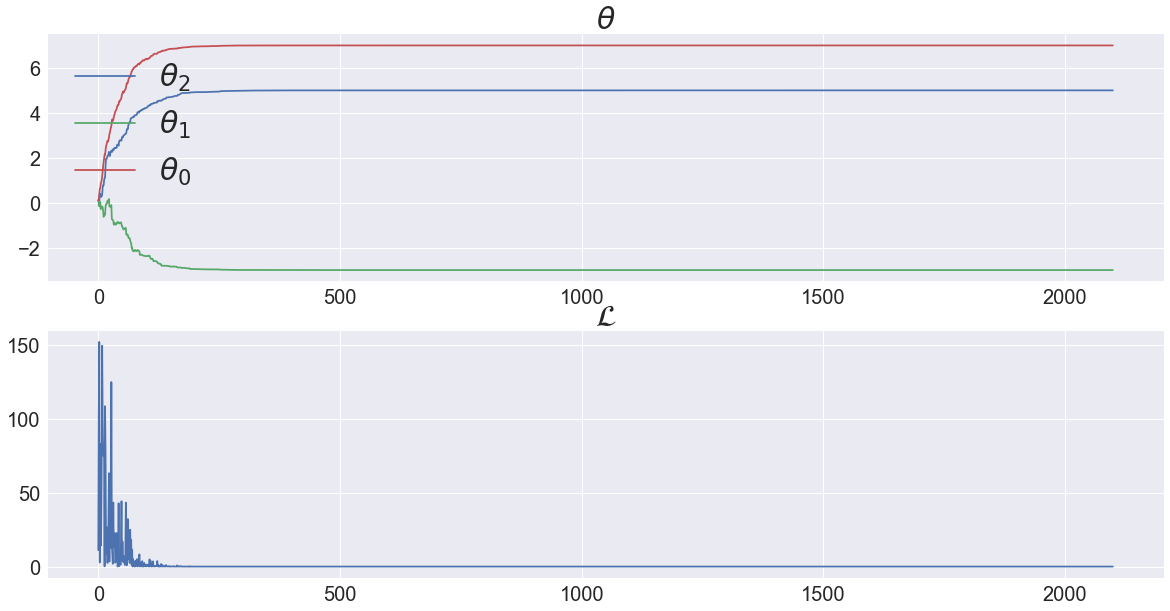

In [14]:
##### Start Your Code(Learning Preparation) #####
th2, th1, th0 = 0.1, 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####

th2_list, th1_list, th0_list = [], [], []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        x2, x1, y = data_sample[2], data_sample[1], data_sample[-1]
        
        ##### Start Your Code(Forward Propagation) #####
        pred = th2*x2 + th1*x1 + th0
        loss = np.power(y - pred, 2)
        ##### Start Your Code(Forward Propagation) #####
        th2_list.append(th2)
        th1_list.append(th1)
        th0_list.append(th0)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th2 = th2 + 2*x2*lr*(y - pred)
        th1 = th1 + 2*x1*lr*(y - pred)
        th0 = th0 + 2*lr*(y - pred)
        ##### Start Your Code(Gradient Descent Method) #####
        
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th2_list, label = r'$\theta_{2}$')
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

Step.3의 결과를 보게 되면 mean을 0으로 standard deviation을 1로 맞추었기 때문에<br>
$\theta$들간의 학습이 동일하게 되는 것을 볼 수 있다<br>
이제부터는 mean과 std를 변화시키면서 학습 결과를 관찰해 볼것이다

***
**Programming**  
위에서 진행했던 것과 동일하게 진행하며
$$y = 5x_{2} - 3x_{1} + 7$$
에서부터 700개의 data sample을 가지는 dataset을 만드세요.<br><br>
x2의 mean은 0으로 standard deviation는 3으로 설정합니다<br>
x1의 mean은 0 standard deviation은 그대로 1로 설정합니다

In [15]:
##### Start Your Code(Learning Preparation) #####
n_sample = 200
coefficient_list = [7, -3, 5]
data_gen = LR_dataset_generator(feature_dim = 2)
data_gen.set_n_sample(n_sample)
distribution_params = {
    1: {'mean':0, 'std':1},
    2: {'mean':0, 'std':3}
}
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)

x_data, y_data = data_gen.make_dataset()
dataset = np.hstack((x_data, y_data))
##### End Your Code(Learning Preparation) #####


Learning and visualization 과정은 위에서와 동일하게 진행합니다

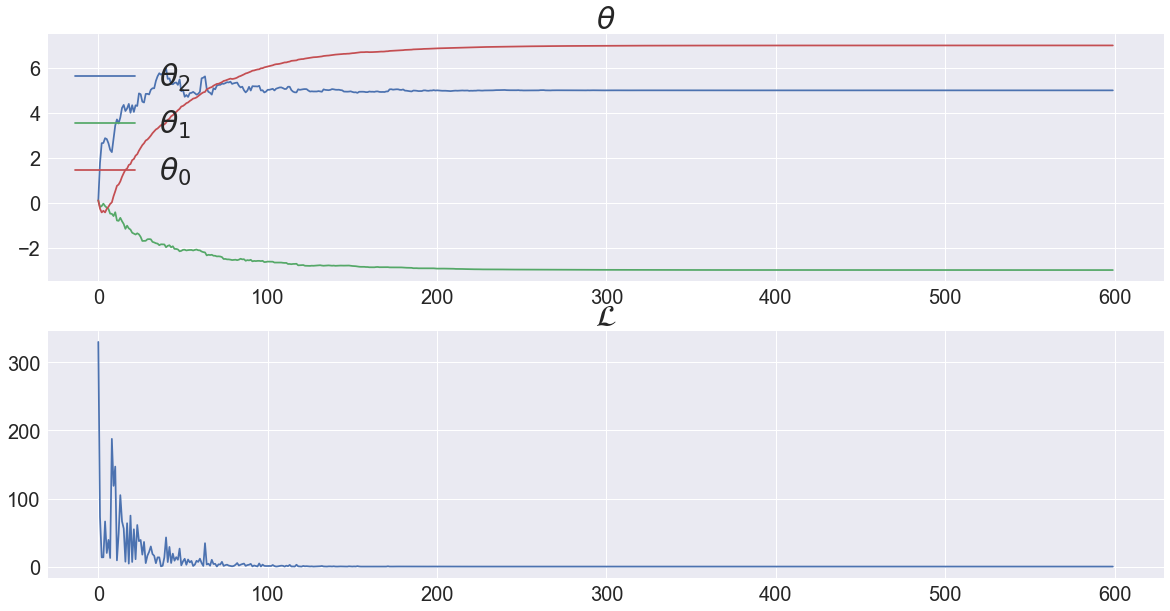

In [16]:
##### Start Your Code(Learning Preparation) #####
th2, th1, th0 = 0.1, 0.1, 0.1
lr = 0.01
epochs = 3
##### End Your Code(Learning Preparation) #####

th2_list, th1_list, th0_list = [], [], []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        x2, x1, y = data_sample[2], data_sample[1], data_sample[-1]
        
        ##### Start Your Code(Forward Propagation) #####
        pred = th2*x2 + th1*x1 + th0
        loss = np.power(y - pred, 2)
        ##### Start Your Code(Forward Propagation) #####
        th2_list.append(th2)
        th1_list.append(th1)
        th0_list.append(th0)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th2 = th2 + 2*x2*lr*(y - pred)
        th1 = th1 + 2*x1*lr*(y - pred)
        th0 = th0 + 2*lr*(y - pred)
        ##### Start Your Code(Gradient Descent Method) #####
        
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th2_list, label = r'$\theta_{2}$')
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

x2의 std를 3으로 설정하였기 때문에
$\theta_{2}$가 다른 $\theta$들보다 먼저 학습이 진행된 것을 볼수 있습니다

다음은 Mean을 변경해볼 것이다<br>
x2의 mean은 3으로 standard deviation는 1으로 설정하고<br>
x1의 mean은 0 standard deviation은 그대로 1로 설정합니다<br>
이번 코드에서는 epoch가 3으로 부족해서 10으로 진행하겠습니다

In [17]:
##### Start Your Code(Learning Preparation) #####
n_sample = 200
coefficient_list = [7, -3, 5]
data_gen = LR_dataset_generator(feature_dim = 2)
data_gen.set_n_sample(n_sample)
distribution_params = {
    1: {'mean':0, 'std':1},
    2: {'mean':3, 'std':1}
}
data_gen.set_coefficient(coefficient_list)
data_gen.set_distribution_params(distribution_params)

x_data, y_data = data_gen.make_dataset()
dataset = np.hstack((x_data, y_data))
##### End Your Code(Learning Preparation) #####


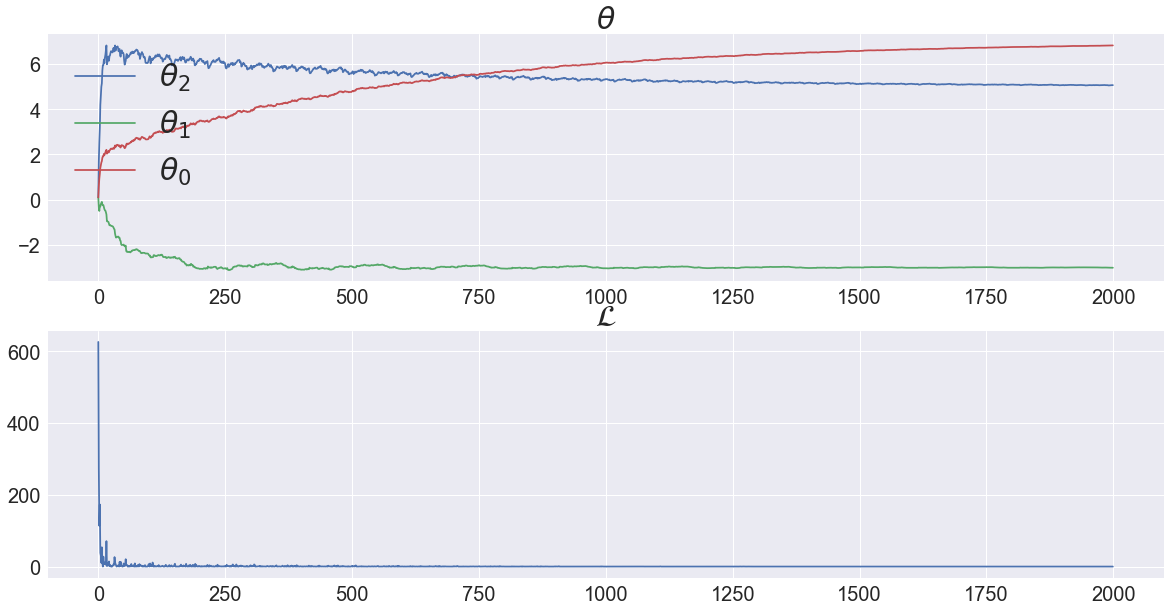

In [18]:
##### Start Your Code(Learning Preparation) #####
th2, th1, th0 = 0.1, 0.1, 0.1
lr = 0.01
epochs = 10
##### End Your Code(Learning Preparation) #####

th2_list, th1_list, th0_list = [], [], []
loss_list = []

for epoch in range(epochs):
    for data_sample in dataset:
        x2, x1, y = data_sample[2], data_sample[1], data_sample[-1]
        
        ##### Start Your Code(Forward Propagation) #####
        pred = th2*x2 + th1*x1 + th0
        loss = np.power(y - pred, 2)
        ##### Start Your Code(Forward Propagation) #####
        th2_list.append(th2)
        th1_list.append(th1)
        th0_list.append(th0)
        loss_list.append(loss)
        
        ##### Start Your Code(Gradient Descent Method) #####
        th2 = th2 + 2*x2*lr*(y - pred)
        th1 = th1 + 2*x1*lr*(y - pred)
        th0 = th0 + 2*lr*(y - pred)
        ##### Start Your Code(Gradient Descent Method) #####
        
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th2_list, label = r'$\theta_{2}$')
ax[0].plot(th1_list, label = r'$\theta_{1}$')
ax[0].plot(th0_list, label = r'$\theta_{0}$')
ax[0].legend(loc = 'upper left', fontsize = 30)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

Mean을 변경시키는 경우 같은 epoch안에 학습이 끝나지 않았고<br>
3배 가량의 epoch동안 학습을 해야<br>
정상적으로 학습이 완료되는 것을 확인할수 있습니다